How to retrieve data from Twitter with Tweepy?
Use Twitter data to create a social network diagram using either NetworkX or Plotly for the College of Arts & Sciences (@GSUArtSci).

a. Select 5 friends of “GSUArtSci” and 5 followers of “GSUArtSci”.

b. For each friend of “GSUArtSci”, select at most 2 friends. For example, if A is a friend of “GSUArtSci”, then select 2 friends of A.

c. For each follower of “GSUArtSci” , select at most 2 followers. For example, if B is a follower of “GSUArtSci”, then select 2 followers of B.

d. There should be an edge between any two nodes who are either friends or followers.

e. Create TWO network visualizations with two different layouts.

f. Each node should include the screen name of the Twitter user.

In [1]:
import tweepy 
import pandas as pd
import tweepy 

auth = tweepy.OAuthHandler("3BKqbNtjwlArSJePRFuuMqqTl", "09P9yFDGwRFOb2wuQPv5kBJrgF4q0kX6bgw811rGRvyNp3jvwe")
auth.set_access_token("1151876532538937346-3JltXA2YKs44NG7HezZq4Vqi5w9B3f", "DJxF8cEsaBoQwzg3OlyZTdPmdyPaQ3qTXzcvfW1kpOglu")

api = tweepy.API(auth)

# Create an empty edge list
edge_list = pd.DataFrame(columns = ["source", "target"])

# Get a list of friends and friends of the friends
gsu_friends = api.friends("GSUArtSci")
for friend in gsu_friends[0:5]: 
    edge_list = edge_list.append({'source' : "GSUArtSci", 'target' : friend.screen_name} , ignore_index=True)    
    
    for friend_of_friend in api.friends(friend.screen_name)[0:2]: # Only retrieve the first 2 friends of the friend 
        edge_list = edge_list.append({'source' : friend.screen_name, 'target' : friend_of_friend.screen_name} , ignore_index=True) 



In [2]:
# Get a list of followers and follower of the followers
gsu_followers = api.followers("GSUArtSci")
for follower in gsu_followers[0:5]:
    edge_list = edge_list.append({'source' : follower.screen_name, 'target' : "GSUArtSci"} , ignore_index=True)

    for follower_of_follower in api.followers(follower.screen_name)[0:2]:
        edge_list = edge_list.append({'source' : follower_of_follower.screen_name, 'target' : follower.screen_name} , ignore_index=True)
    
# df.to_csv('~lisun/GSU/2019 Summer/Data Visualization/Project5/FriendAndFollowers1.csv')

In [24]:
api.rate_limit_status()


{'rate_limit_context': {'access_token': '1151876532538937346-3JltXA2YKs44NG7HezZq4Vqi5w9B3f'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1564418449},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1564418449},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1564418449},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1564418449},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1564418449},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1564418449},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1564418449},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1564418449},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1564418449},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1564418449}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 179,
    '

In [3]:
import networkx as nx
import pandas as pd
import pylab as plt
from pylab import rcParams

rcParams['figure.figsize'] = 12, 9

df = pd.read_csv('~lisun/GSU/2019 Summer/Data Visualization/Project5/FriendAndFollowers1.csv')

# G=nx.Graph()#  G is an empty Graph
# nodes=pd.concat([edge_list['source'],edge_list['target']]).unique()
# G.add_nodes_from(nodes)

# edges=list(zip(edge_list['source'],edge_list['target']))
# G.add_edges_from(edges)

G=nx.Graph()
nodes=pd.concat([df['source'],df['target']]).unique()
G.add_nodes_from(nodes)

edges=list(zip(df['source'],df['target']))
G.add_edges_from(edges)

Using Networkx to draw network connection

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



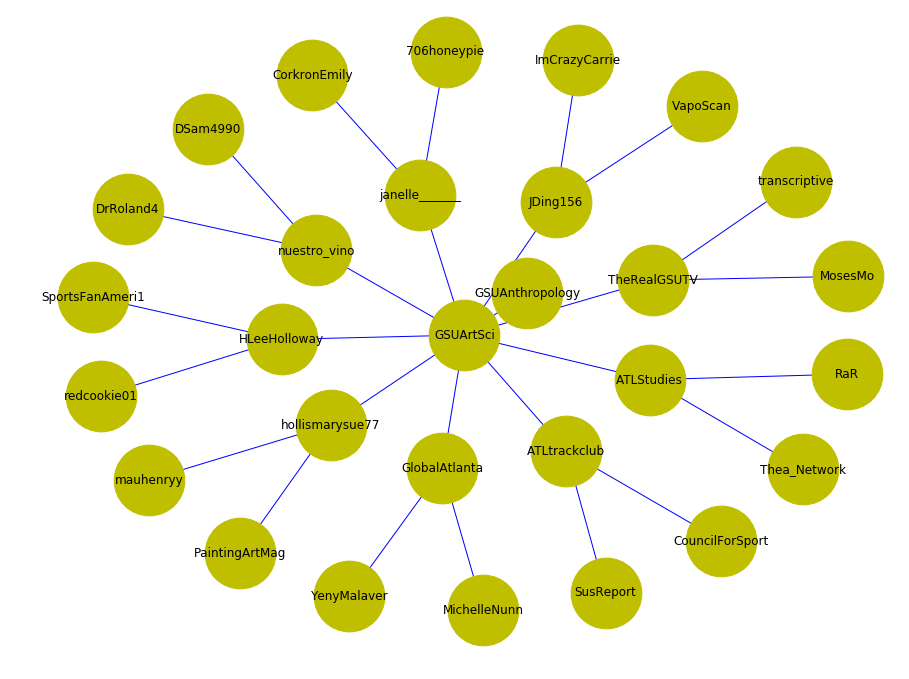

In [14]:
# #########################
# ####  kamada_kawai   ####
# #########################

pos=nx.kamada_kawai_layout(G)
title = 'GSUArtSci SOCIAL NETWORK DIAGRAM' + '<br>' + 'kamada_kawai_layout' 
nx.draw_kamada_kawai(G,with_labels = True,edge_color='b', node_color = 'y', node_size = 5000)
plt.show()

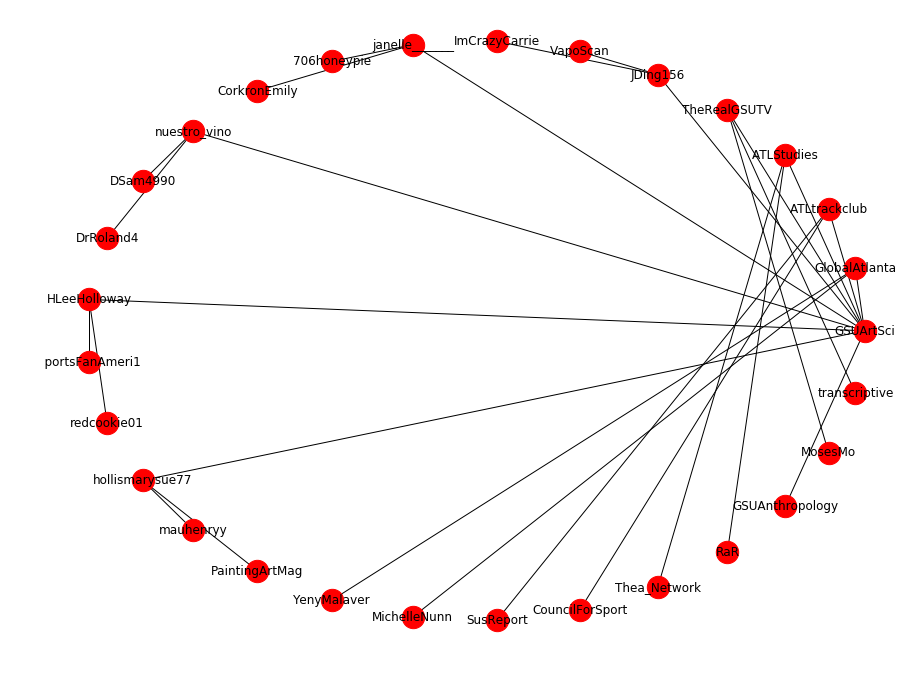

In [70]:
#######################
#### Draw_circular ####
#######################

pos=nx.circular_layout(G)
nx.draw_circular(G,with_labels = True, node_size = 500)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=10,font_color = 'blue')
plt.show()


Using Plotly to draw network connections

In [5]:
import networkx as nx
import pandas as pd
import plotly.offline as off
off.init_notebook_mode(connected=True)

df1 = pd.read_csv('~lisun/GSU/2019 Summer/Data Visualization/Project5/FriendAndFollowers.csv')
df1.head()


G=nx.Graph()  #  G is an empty Graph


# seperatelly generate nodes for group friend and follower 
nodes1=pd.concat([df1['source_friend'],df1['target_friend']]).dropna()
my_nodes1=nodes1.unique()
G.add_nodes_from(my_nodes1)


my_nodes2=[]
nodes2=pd.concat([df1['source_follower'],df1['target_follower']]).dropna()
nodes2=nodes2.unique()
for k in nodes2:               # drop the duplicated name with my_nodes1
    if k not in my_nodes1:
        my_nodes2.append(k)
G.add_nodes_from(my_nodes2)


my_edges1=list(zip(df1['source_friend'],df1['target_friend']))
G.add_edges_from(my_edges1)
my_edges2=list(zip(df1['source_follower'],df1['target_follower']))
G.add_edges_from(my_edges2)
 

def make_fig(pos,node1, node2, title):
    # generate nodes traces
    Xn1=[]
    Xn2=[]
    Yn1=[]
    Yn2=[]

    for k in pos.keys():
        if k in my_nodes1:
            Xn1.append(pos[k][0]) 
            Yn1.append(pos[k][1]) 
        if k in my_nodes2:
            Xn2.append(pos[k][0]) 
            Yn2.append(pos[k][1])  


    trace_nodes1=dict(type='scatter',
                     x=Xn1, 
                     y=Yn1,
                     name = 'Friends',
                     text=my_nodes1,
                     mode='markers+text',
                     marker=dict(size=70, color='red'),
                     hoverinfo='text')

    trace_nodes2=dict(type='scatter',
                     x=Xn2, 
                     y=Yn2,
                     name = 'Followers',
                     text=my_nodes2,
                     mode='markers + text',
                     marker=dict(size=60, color='yellow'),
                     hoverinfo='text')

    # generate trace for edges
    Xe=[]
    Ye=[]
    for e in G.edges():
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])


    trace_edges=dict(type='scatter',
                     mode='lines',
                     x=Xe,
                     y=Ye,
                     name = 'Edges',
                     line=dict(width=1, color='rgb(25,25,25)'),
                     hoverinfo= 'none' 
                    )



    axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title='' 
              )


    layout=dict(title= title,  
                font= dict(family='Balto'),
                width=1000,
                height=1000,
                autosize=False,
                showlegend=True,
                legend=dict(x=0.05,y=0.95),
                xaxis=axis,
                yaxis=axis,
                margin=dict(
                l=40,
                r=40,
                b=85,
                t=100,
                pad=0,
        ),
        hovermode='closest',
        plot_bgcolor='#efecea', #set background color            
        )

    fig = dict(data=[trace_nodes1, trace_nodes2,trace_edges], layout=layout)
    
    return fig

In [6]:
##############################
####  kamada_kawai_layout ####
##############################

pos=nx.kamada_kawai_layout(G)
title = 'GSUArtSci SOCIAL NETWORK DIAGRAM' + '<br>' + 'kamada_kawai_layout'  
fig=make_fig(pos,my_nodes1, my_nodes2, title)
off.iplot(fig)

In [7]:
########################
####  circular_layout ####
########################

pos=nx.circular_layout(G)
title = 'GSUArtSci SOCIAL NETWORK DIAGRAM' + '<br>' + 'circular_layout'
fig=make_fig(pos,my_nodes1, my_nodes2,title)
off.iplot(fig)

2. Retrieve the most recent tweets from Boris Johnson’s Twitter account (@BorisJohnson). Collect as many tweets as you can, excluding retweets. Find the 10 most frequently used words from the text and draw a bar chart using Plotly (not Seaborn).

a. Clean the text to remove all the URL, email, number, etc.

b. Remove all the stop words.

c. Convert all words to lower case letters.

In [8]:
from cleantext import clean
import nltk                    # For removing stop words
from nltk.corpus import stopwords
import collections             # For frequency analysis
from textblob import TextBlob  # For sentiment analysis


# tweets = tweepy.Cursor(api.user_timeline, id="BorisJohnson",exclude_replies = True).items(20)
tweets = api.user_timeline("BorisJohnson",include_rts=False)

tweet_text = [tweet.text for tweet in tweets]
words = []

# Clean text and split into words
for i in range(len(tweet_text)):
   # Clean text with "cleantext"
    tweet_text[i] = clean(tweet_text[i], 
                          no_urls=True, 
                          no_emails=True, 
                          no_numbers=True, 
                          no_phone_numbers=True,
                          no_currency_symbols=True,
                          no_line_breaks=True,
                          no_punct=True,
                          replace_with_url="",
                          replace_with_number="")
    
    words.append(tweet_text[i].split())
    
# Flatten the word list to do frequency test
words = [y for x in words for y in x]

# Remove stop words
stop_words = nltk.corpus.stopwords.words('english')


words = [w for w in words if not w in stop_words]

word_counts = collections.Counter(words)

# Create a dataframe from the word frequency count and Only get the top 10 frequently used words
word_frequency = pd.DataFrame(word_counts.most_common(10), columns = ["word", "frequency"])
word_frequency

,word,frequency
0,work,5
1,time,3
2,thank,3
3,less,3
4,hours,3
5,today,2
6,leadership,2
7,polls,2
8,close,2
9,last,2


In [9]:
import plotly.graph_objs as go
data = [go.Bar(x=word_frequency['word'],y=word_frequency['frequency'])]
layout = go.Layout(
    title= "10 Most Frequently Used Words in Boris Johnson’s Twitter",
    yaxis=dict(title= dict(text = 'Frequency',font = dict(size = 16 ,color = 'blue'))),
    xaxis=dict(title= dict(text = 'Words',font = dict(size = 16 ,color = 'blue')),tickangle = 15),
)
fig = go.Figure(data=data, layout=layout)
off.iplot(fig)

3. Retrieve at least 20 (or as many as you can) tweets that contains #TheLionKing and conduct the following data analysis and visualization.

a. Conduct sentiment analysis of the tweets and draw a sentiment index lineplot with Plotly (not Seaborn).

b. Clean the text to remove all the URL, email, number, etc.

In [40]:
keyword = "TheLionKing" #+ " -filter:retweets"

tweets = tweepy.Cursor(api.search, q = keyword, 
                       lang="en", since = "2019-01-01").items(50)


tweet_text = [tweet.text for tweet in tweets]
words = []

for i in range(len(tweet_text)):    
    tweet_text[i] = clean(tweet_text[i], 
                          no_urls=True, 
                          no_emails=True, 
                          no_numbers=True, 
                          no_phone_numbers=True,
                          no_currency_symbols=True,
                          no_line_breaks=True,
                          no_punct=True,
                          replace_with_url="",
                          replace_with_number="")
    words.append(tweet_text[i].split())
     

In [41]:
# Sentiment analysis with Textblob package. 

sentiment_objects = [TextBlob(tweet) for tweet in tweet_text]

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])


# Create a sentiment timeline for the search result: TheLionKing. 
data = [dict(
  type = 'scatters',
  y = sentiment_df["polarity"],
  mode = 'lines',
)]

layout = dict(
    title = "Sentiment index for the search result:"+ keyword,
    yaxis = dict(title = 'Polarity'),
    xaxis = dict(title = 'Sentiment Index')
)

off.iplot({'data': data, 'layout':layout}, validate=False)

How to retrieve data from YouTube with Pytube?

4.Retrieve captions from the following YouTube videos, conduct sentiment analysis and draw the sentiment index timeline using Plotly (not Seaborn).

a. Create a sentiment timeline for this video: https://www.youtube.com/watch?v=JtJdZrmeYKc

In [44]:
from pytube import YouTube

def sentimentIndex(yt):

    # Get the caption in English
    caption = yt.captions.get_by_language_code("en")

    # Get the captions in the more readable SRT format (see https://www.speechpad.com/captions/srt). 
    caption_srt = caption.generate_srt_captions()

    # Create a dataframe with indices, time, and texts in separate columns. 
    #Split SRT file into lines.
    caption_lines = caption_srt.splitlines()

    #Create a nested list so we can create data frame out of it. 
    nested = []

    #There are four lines for each item on the list. 
    num_lines_per_item = 4
    for ix in range(0, len(caption_lines) - num_lines_per_item, num_lines_per_item):
        nested.append(caption_lines[ix:ix + num_lines_per_item])

    # Create a data frame of the captions
    caption_df = pd.DataFrame(nested, columns = ["index", "time", "text", "line_break"])

    # Delete the the last column because it's empty. 
    caption_df = caption_df.drop(columns = ["line_break"])

    # Send the text to TextBlob for sentiment analysis
    sentiment_objects = [TextBlob(caption) for caption in caption_df["text"]]

    # Retrieve sentiment values
    sentiment_values = [[sentiment_obj.sentiment.polarity, str(sentiment_obj)] for sentiment_obj in sentiment_objects]

    # Add a "polarity" column to the dataframe
    caption_df["polarity"] = [sentiment_obj.sentiment.polarity for sentiment_obj in sentiment_objects]
    
    # Create a sentiment timeline for a YouTube video. 
    # The X axis is Index (time) . The Y axis is the Polarity.

    data = [dict(
      type = 'scatters',
      x = caption_df["index"],
      y = caption_df["polarity"],
      mode = 'lines',
    )]

    layout = dict(
        title = "Sentiment Index for YouTube Video ",# + yt.title,
        yaxis = dict(title = 'Polarity'),
        xaxis = dict(title = 'Time')
    )
    
    off.iplot({'data': data, 'layout':layout}, validate=False)

plot sentiment timeline for video: https://www.youtube.com/watch?v=JtJdZrmeYKc

In [45]:
yt = YouTube("https://www.youtube.com/watch?v=JtJdZrmeYKc")
plot = sentimentIndex(yt)

b. Create a sentiment timeline for a YouTube video of your choice. https://www.youtube.com/watch?v=DUc9bwZQh3w

In [24]:
yt = YouTube("https://www.youtube.com/watch?v=DUc9bwZQh3w")
plot = sentimentIndex(yt)